# Data Analysis and Visualization using Spotify Dataset

We are using the Spotify dataset(https://github.com/Dataset-Daily/DatasetDaily) to do a statistical analysis and identify the correlation between the attributes and how they have impacted the popularity of the song overtime.

We started the Exploratory Data Analysis (EDA) in Python with Pandas, Matplotlib and NumPy, such as sampling, correlation, etc.to identify missing values, outliers, Correlations.

Visualizing the dataset to answer the following questions:

1. Top # tracks since 1921 to 2020
2. Top track for each year for # years
3. How are the various attributes realated to the popularity of songs by year? (multiple depending on the value range)
4. Top # Tracks of 2020 and visualizing the relation between different attributes
5. What are the trends over the years? How has danceability/Acousticness changed ? Attribute of the top tracks.

### STEP 1 Importing the Libraries

We have used basic python library **Matplotlib**.

We have used **Pandas** for data manipulation and analysis.

We have used **Numpy** for working with arrays.




In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

from scipy import stats
from sklearn.preprocessing import LabelEncoder

### STEP 2 Reading and describing the dataset

We are connecting to the dataset 'Spotify_Data.xlsx' using Pandas and an initial understanding of data structure.

In [2]:
# Reading the Spotify Dataset

df = pd.read_excel('Spotify_Data.xlsx')
#df = pd.read_excel('Spotify_Tryout.xlsx')

# Describing the dataset
print(df.describe())

df.head()

          Unnamed: 0   Acousticness   Danceability   Duration_ms  \
count  168592.000000  168592.000000  168592.000000  1.685920e+05   
mean    84295.500000       0.501360       0.533648  2.327016e+05   
std     48668.462629       0.377993       0.175919  1.223921e+05   
min         0.000000       0.000000       0.000000  5.108000e+03   
25%     42147.750000       0.097800       0.412000  1.721600e+05   
50%     84295.500000       0.515000       0.543000  2.091330e+05   
75%    126443.250000       0.896000       0.662000  2.637070e+05   
max    168591.000000       0.996000       0.988000  5.403500e+06   

              Energy       Explicit  Instrumentalness            key  \
count  168592.000000  168592.000000     168592.000000  168592.000000   
mean        0.488577       0.071516          0.169476       5.196795   
std         0.267346       0.257685          0.315383       3.504587   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.265000       

,Unnamed: 0,Acousticness,Artists,Danceability,Duration_ms,Energy,Explicit,Id,Instrumentalness,key,Liveness,Loudness,Mode,Name,Popularity,Release_date,Speechiness,Tempo,Valence,Year
0,0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


### STEP 3 Converting Datatype of columns and dropping irrelevant columns 

Identify the column's datatype and convert the object datatype to appropriate type if applicable.Object data types with datetime and numbers should be converted to appropriate data types for analysis. Object data type with string values need not be converted.

In [3]:
# Printing the datatype for each column and identify data types that needs to be converted to appopraite datatype for analysis

print(df.shape)

print(df.dtypes)
print(df.columns)

# Drop irrelevant columns from the dataset
columns_to_del = ['Unnamed: 0', 'Id']
df.drop(columns_to_del, inplace=True, axis=1)

# Printing the count of each datattype
print(df.dtypes.value_counts())

#Identifying all the columns of datatype = Object
print(df.select_dtypes(include=['object']).columns)


(168592, 20)
Unnamed: 0            int64
Acousticness        float64
Artists              object
Danceability        float64
Duration_ms           int64
Energy              float64
Explicit              int64
Id                   object
Instrumentalness    float64
key                   int64
Liveness            float64
Loudness            float64
Mode                  int64
Name                 object
Popularity            int64
Release_date         object
Speechiness         float64
Tempo               float64
Valence             float64
Year                  int64
dtype: object
Index(['Unnamed: 0', 'Acousticness', 'Artists', 'Danceability', 'Duration_ms',
       'Energy', 'Explicit', 'Id', 'Instrumentalness', 'key', 'Liveness',
       'Loudness', 'Mode', 'Name', 'Popularity', 'Release_date', 'Speechiness',
       'Tempo', 'Valence', 'Year'],
      dtype='object')
float64    9
int64      6
object     3
dtype: int64
Index(['Artists', 'Name', 'Release_date'], dtype='object')


In [8]:
# Converting Releas_date from Object to DateTime
#df['Release_date'] = pd.to_datetime(df['Release_date'],format='DD/MM/YYYY')
#print(df.dtypes.value_counts())

### STEP 4 Identifying and Handling Missing Values

Using Pandas and Numpy to identify and handle missing values.No missing values were identified hence no actions required.


In [4]:
#Check for null values int he overall dataset
print(df.isnull().sum().sum())  

# Identify column names with null values
df.loc[:, df.isnull().any()].columns 

0


Index([], dtype='object')

### Step 5 Identifying and handling Outliers
We are leaving the outliers as-is since these are the valid characteristic of songs and a particular range cannot be set for these characteristics.
Assumption:All attributes with the value of 0 is considered to be not-rated


Text(0, 0.5, 'Values')

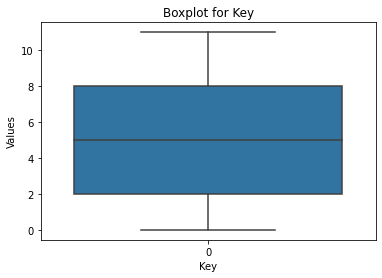

In [5]:
## IDENTIFYING OUTLIERS
# Created mutiple boxplots based on comparable range of values
# Removed Explicit and Mode as they are Boolean values

# Boxplot for Key
fig, ax = plt.subplots(1)
mpl.rcParams['figure.figsize'] = (5,5)
ax = sns.boxplot(data=df['key'])
ax.set_title('Boxplot for Key')
ax.set_xlabel('Key')
ax.set_ylabel('Values')

Text(0, 0.5, 'Values')

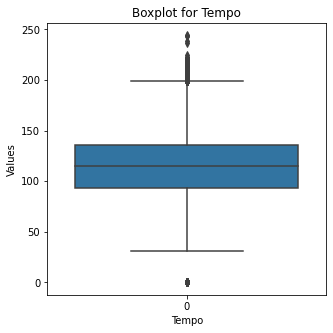

In [6]:
# Boxplot for Tempo
fig, ax = plt.subplots(1)
mpl.rcParams['figure.figsize'] = (5,5)
ax = sns.boxplot(data=df['Tempo'])
ax.set_title('Boxplot for Tempo')
ax.set_xlabel('Tempo')
ax.set_ylabel('Values')

Outliers for Tempo can be seen in the above box plot, more outliers are observed above Q3.Some outliers observed below Q1.

In [7]:
# Boxplot for Popularity
fig, ax = plt.subplots(1)
mpl.rcParams['figure.figsize'] = (5,5)
ax = sns.boxplot(data=df['Popularity'])
ax.set_title('Boxplot for Popularity')
ax.set_xlabel('Popularity')
ax.set_ylabel('Values')yes


SyntaxError: invalid syntax (<ipython-input-7-9c5da7290515>, line 7)

Text(0, 0.5, 'Values')

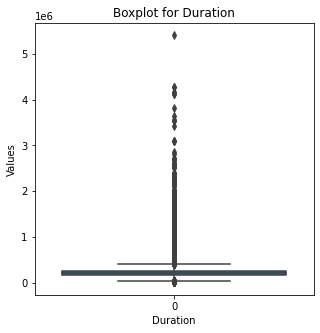

In [12]:
# Boxplot for Duration
fig, ax = plt.subplots(1)
mpl.rcParams['figure.figsize'] = (5,5)
ax = sns.boxplot(data=df['Duration_ms'])
ax.set_title('Boxplot for Duration')
ax.set_xlabel('Duration')
ax.set_ylabel('Values')

Outliers are present for duration with most of them lying in Q3.

Text(0, 0.5, 'Values')

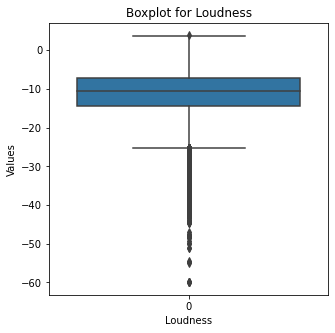

In [13]:
# Boxplot for Loudness
fig, ax = plt.subplots(1)
mpl.rcParams['figure.figsize'] = (5,5)
ax = sns.boxplot(data=df['Loudness'])
ax.set_title('Boxplot for Loudness')
ax.set_xlabel('Loudness')
ax.set_ylabel('Values')

Outliers are present for Loudness with most of them lying in Q1.

Text(0, 0.5, 'Values')

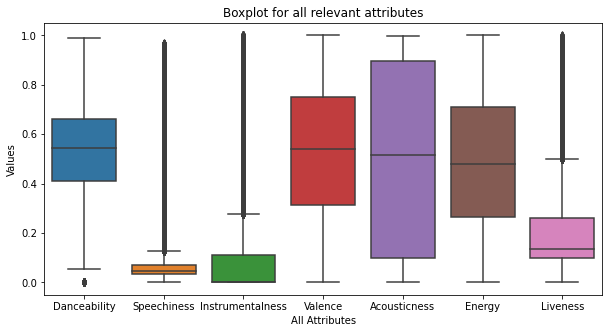

In [14]:
# Boxplot for remaining attributes
df_lst1 =['Danceability','Speechiness','Instrumentalness','Valence','Acousticness','Energy','Liveness']
mpl.rcParams['figure.figsize'] = (10,5)
fig, ax1 = plt.subplots(1)
ax1 = sns.boxplot(data=df[df_lst1])
ax1.set_title('Boxplot for all relevant attributes')
ax1.set_xlabel('All Attributes')
ax1.set_ylabel('Values')


In the above boxplot for rest of the attributes, 3 of the attributes, namely, Speechiness, Instrumentalness and Liveness 
have outliers present in Q3 and danceability have outliers present in Q1. Number of outliers are more in  Speechiness, Instrumentalness and Liveness compared to danceability. Rest all are without outliers


### STEP 6 Identifying Correlation between attributes
Convert Categorical variables to numeric for Correlation analysis

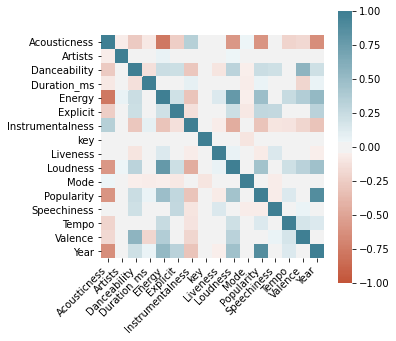

In [28]:
# Assigning numerical values using Label encoder for required categorical attributes
# ???? For Ankita - Does Artist makes sense in corr? ??????
labelencoder = LabelEncoder()
df['Artists'] = labelencoder.fit_transform(df['Artists'])
df['Year'] = labelencoder.fit_transform(df['Year'])

corr = df.corr()

mpl.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In the above HeatMap we can see the correlation between all the attributes. A strong correlation exists between Popularity-Year, Loudness-Energy, Valence - Danceability. Negetive correlation exists between Acousticness-Energy, Acousticness-Loudness, Acousticness-Popularity, Acousticness-Year

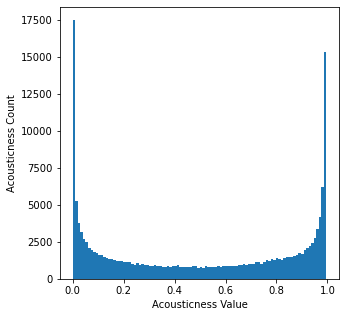

In [18]:
# Histogram for Acousticness
mpl.rcParams['figure.figsize'] = (5,5)
plt.hist(df.Acousticness,bins=100)
plt.xlabel('Acousticness Value')
plt.ylabel('Acousticness Count')
plt.show()

The histogram for Acousticness shows majority of songs has a value of either 0 or 1.

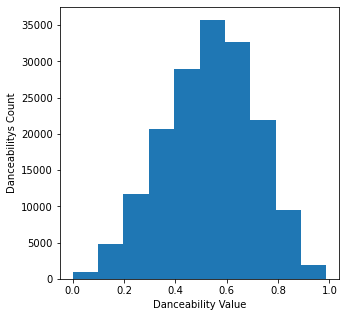

In [10]:
# Histogram for Danceability
mpl.rcParams['figure.figsize'] = (5,5)
plt.hist(df.Danceability,bins=10)
plt.xlabel('Danceability Value')
plt.ylabel('Danceabilitys Count')
plt.show()

Histogram for Danceability shows a normal standard curve with majority of the songs having Danceability value falling between the range of 0.5 and 0.6

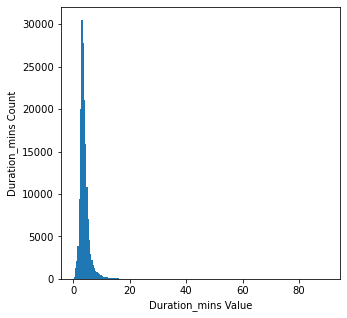

In [30]:
# Histogram for Duration_ms
mpl.rcParams['figure.figsize'] = (5,5)
Duration_mins = df['Duration_ms'] / 60000
plt.hist(Duration_mins,bins=200)
plt.xlabel('Duration_mins Value')
plt.ylabel('Duration_mins Count')
plt.show()

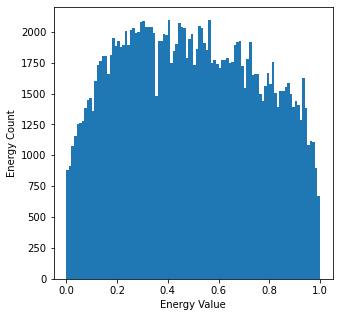

In [17]:
# Histogram for Energy
mpl.rcParams['figure.figsize'] = (5,5)
plt.hist(df.Energy,bins=100)
plt.xlabel('Energy Value')
plt.ylabel('Energy Count')
plt.show()

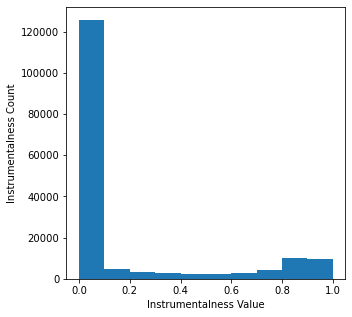

In [6]:
# Histogram for Instrumentalness
mpl.rcParams['figure.figsize'] = (5,5)
plt.hist(df.Instrumentalness,bins=10)
plt.xlabel('Instrumentalness Value')
plt.ylabel('Instrumentalness Count')
plt.show()

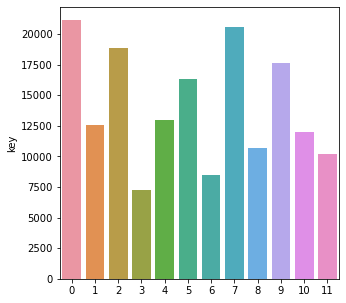

In [20]:
# Bar plot for key
mpl.rcParams['figure.figsize'] = (5,5)
sns.barplot(x=df.key.value_counts().index, y=df.key.value_counts())

The bar plot above shows the frequency of the 12 keys.

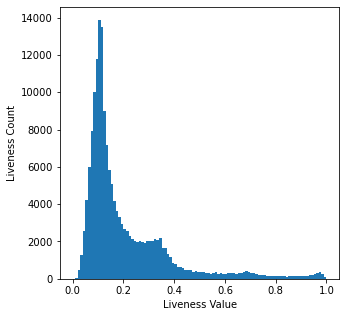

In [29]:
# Histogram for Liveness
mpl.rcParams['figure.figsize'] = (5,5)
plt.hist(df.Liveness,bins=100)
plt.xlabel('Liveness Value')
plt.ylabel('Liveness Count')
plt.show()

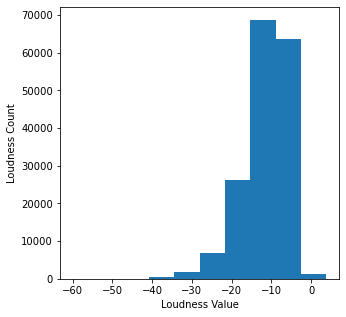

In [17]:
# Histogram for Loudness
mpl.rcParams['figure.figsize'] = (5,5)
plt.hist(df.Loudness,bins=10)
plt.xlabel('Loudness Value')
plt.ylabel('Loudness Count')
plt.show()

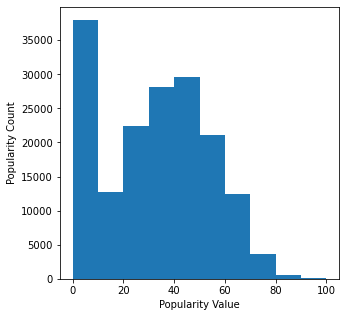

In [19]:
# Histogram for Popularity
mpl.rcParams['figure.figsize'] = (5,5)
plt.hist(df.Popularity,bins=10)
plt.xlabel('Popularity Value')
plt.ylabel('Popularity Count')
plt.show()

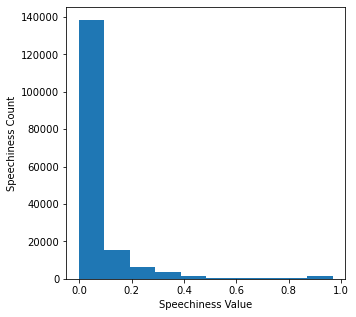

In [20]:
# Histogram for Speechiness
mpl.rcParams['figure.figsize'] = (5,5)
plt.hist(df.Speechiness,bins=10)
plt.xlabel('Speechiness Value')
plt.ylabel('Speechiness Count')
plt.show()

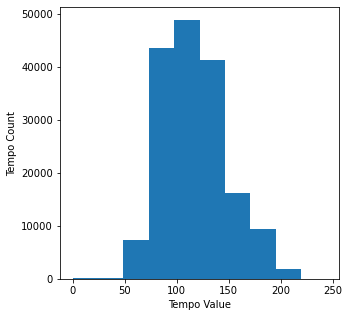

In [21]:
# Histogram for Tempo
mpl.rcParams['figure.figsize'] = (5,5)
plt.hist(df.Tempo,bins=10)
plt.xlabel('Tempo Value')
plt.ylabel('Tempo Count')
plt.show()

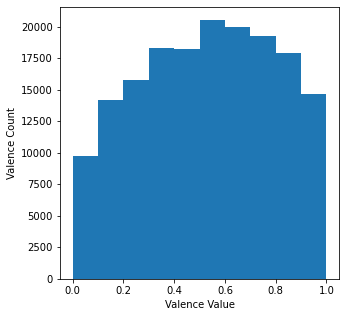

In [22]:
# Histogram for Valence
mpl.rcParams['figure.figsize'] = (5,5)
plt.hist(df.Valence,bins=10)
plt.xlabel('Valence Value')
plt.ylabel('Valence Count')
plt.show()

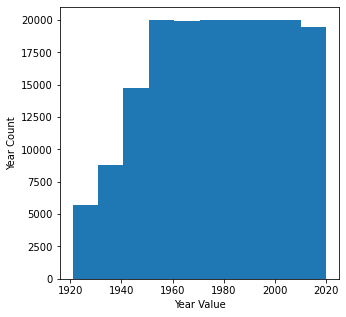

In [9]:
# Histogram for Year
# ??? Ankita Is year a ctegorical-ordinal or numerical continuous interval???
mpl.rcParams['figure.figsize'] = (5,5)
plt.hist(df.Year,bins=10)
plt.xlabel('Year Value')
plt.ylabel('Year Count')
plt.show()

In [6]:

df['Duration_mins'] = df['Duration_ms'] / 60000
duration_count = df.groupby('Year', as_index=False)['Duration_mins'].mean()

duration_count = pd.DataFrame(duration_count)
duration_count

,Year,Duration_mins
0,1921,3.831865
1,1922,2.798409
2,1923,2.972605
3,1924,3.081525
4,1925,3.068845
...,...,...
95,2016,3.663614
96,2017,3.475314
97,2018,3.341289
98,2019,3.264978


In [12]:

df['Duration_mins'] = df['Duration_ms'] / 60000
duration_count = df.groupby('Duration_mins', as_index=False)['Id'].count()
duration_count.rename(columns={"Id":"Count"},inplace=True)
duration_count = pd.DataFrame(duration_count)
duration_count

,Duration_mins,Count
0,0.085133,1
1,0.099850,1
2,0.106033,1
3,0.107783,1
4,0.147550,2
...,...,...
49508,68.670967,2
49509,69.411417,1
49510,71.156783,1
49511,71.167233,1


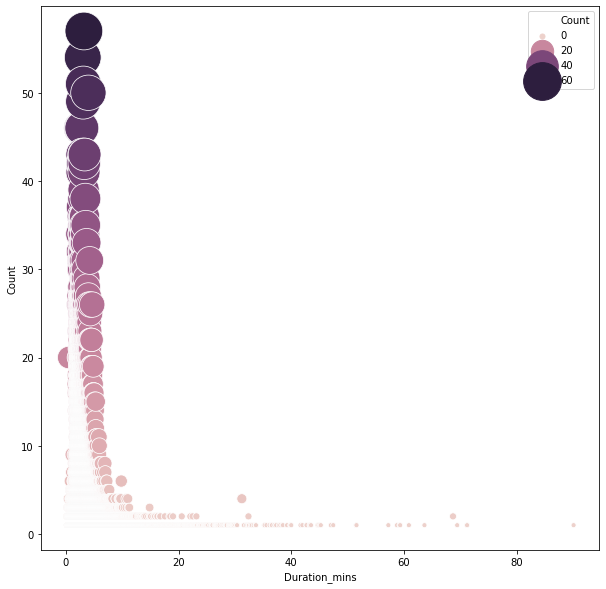

In [16]:
# Scatter plot for Duration
minsize = min(duration_count['Count'] * 25)
maxsize = max(duration_count['Count'] * 25)
mpl.rcParams['figure.figsize'] = (10,10)
ax = sns.scatterplot(x="Duration_mins", y="Count",
                    hue=duration_count["Count"], size=duration_count["Count"], sizes=(minsize, maxsize),
 #                   palette=cmap,
                    data=duration_count)

#ax. set(xlim=(0, 45))